<a href="https://colab.research.google.com/github/jovanadobreva/Labs-I2DS/blob/main/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font  color='Orange'>Data Preparation & KNN Classification</font>


# <font color = 'Orange'> Read your Dataset (.csv)</font>
run the code below for downloading the dataset

In [1]:
!gdown 1CkUp_wtuauTNL9aOW-K52jDlTXqD4KWS

'gdown' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
import pandas as pd

df = pd.read_csv('./content/diabetes.csv')

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# <font color = 'Orange'> Data preprocessing </font>

Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Input columns: Pregnancies, Glucose, BloodPressure,SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age

Output columns: Outcome 0-->doesn't have diabetes / 1--> has diabetes

## <font color = 'Orange'>Detect the Missing values</font>

Count the percentage of missing values in every column of the Dataset.

In [5]:
#add your code
df.isnull().sum()

Pregnancies                 14
Glucose                      0
BloodPressure                0
SkinThickness                8
Insulin                      0
BMI                         10
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [12]:
#add your code
missing_values = df.isnull().sum()
missing_values_per = (missing_values / len(df)) * 100
missing_values_per

Pregnancies                 1.822917
Glucose                     0.000000
BloodPressure               0.000000
SkinThickness               1.041667
Insulin                     0.000000
BMI                         1.302083
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64

## <font color = 'Orange'> Find reasons for the missing values</font>


With the help of visualization matrix, heatmap, dendrogram, show the dependence between the columns with missing values

Visualize the missing values using Missingno library

In [13]:
#add your code
import missingno as msno

<Axes: >

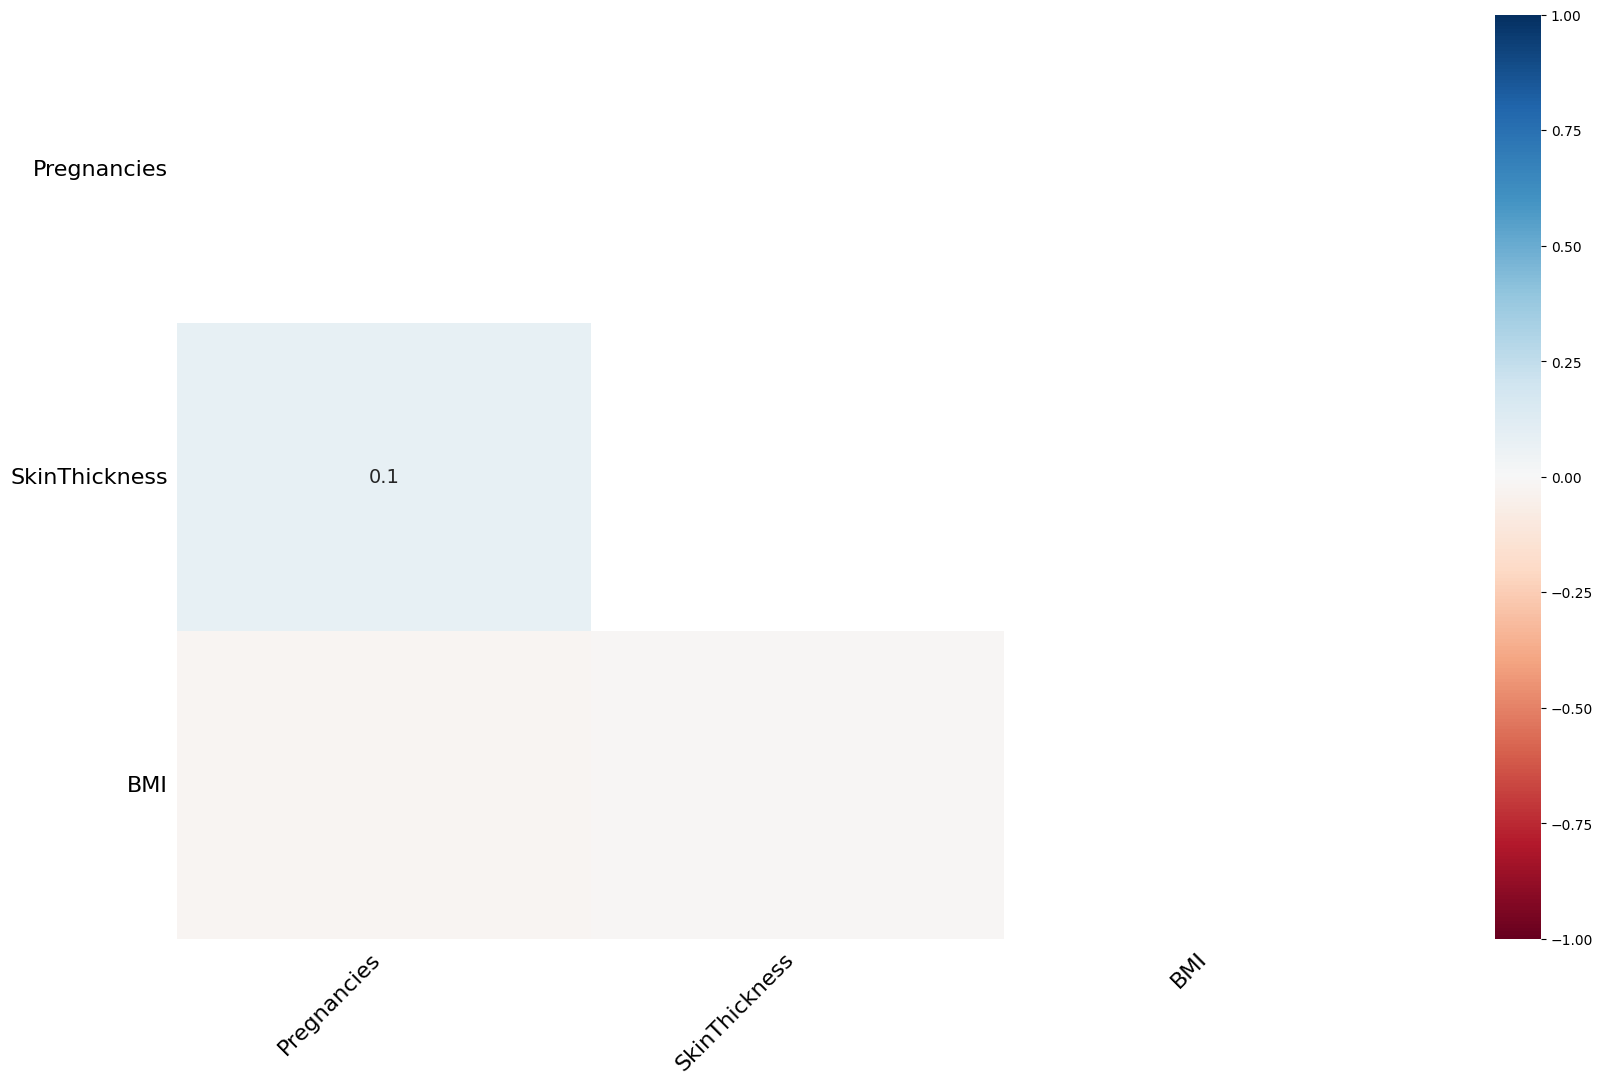

In [14]:
msno.heatmap(df)

## <font color = 'Orange'>Handle the missing values</font>

In [16]:
#add your code
train = df.copy()

In [18]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='constant', fill_value=0)

In [19]:
train.iloc[:, :] = imp.fit_transform(df)

In [22]:
df['BMI'].isnull().sum()

10

In [21]:
train['BMI'].isnull().sum()

0

## <font color = 'Orange'>Save the new Dataset(.csv) without the missing values</font>

In [36]:
#add your code
train.to_csv('./content/diabetes_no_none.csv', index=False)

Print the first rows of your final Dataset

In [37]:
#add your code
final_dataset = pd.read_csv("./content/diabetes_no_none.csv")
print(final_dataset.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0      148             72           35.0        0  33.6   
1          1.0       85             66           29.0        0  26.6   
2          8.0      183             64            0.0        0  23.3   
3          1.0       89             66           23.0       94  28.1   
4          0.0      137             40           35.0      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


# <font color='orange'>KNN Classification</font>

In [38]:
final_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

##<font color = 'Orange'>Split the dataset for training and testing in ratio 80:20 </font>


In [39]:
final_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.0,0,33.6,0.627,50,1
1,1.0,85,66,29.0,0,26.6,0.351,31,0
2,8.0,183,64,0.0,0,23.3,0.672,32,1
3,1.0,89,66,23.0,94,28.1,0.167,21,0
4,0.0,137,40,35.0,168,43.1,2.288,33,1


In [40]:
#add your code
from sklearn.model_selection import train_test_split
list = train_test_split(final_dataset.iloc[:, :-1], final_dataset['Outcome'], test_size=0.2)

In [41]:
x_train, x_test, y_train, y_test = list

## <font color = 'Orange'>Initialize the KNN Classification model, and use the fit function for training the model</font>

In [50]:
#add your code
from sklearn.neighbors import KNeighborsClassifier
cls = KNeighborsClassifier(n_neighbors=5)

In [51]:
x_train.shape, y_train.shape

((614, 8), (614,))

In [52]:
x_train.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [53]:
cls.fit(x_train, y_train)

KNeighborsClassifier()

## <font color = 'Orange'>Predict the outcomes for X test</font>

In [54]:
#add your code
y_pred = cls.predict(x_test)
y_pred

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
      dtype=int64)

## <font color = 'Orange'>See the model performance, by using sklearn metrics for classification</font>



In [55]:
#add your code
from sklearn.metrics import classification_report, confusion_matrix, f1_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       100
           1       0.65      0.48      0.55        54

    accuracy                           0.73       154
   macro avg       0.70      0.67      0.68       154
weighted avg       0.72      0.73      0.72       154



In [57]:
print(confusion_matrix(y_test, y_pred))

[[86 14]
 [28 26]]


In [58]:
f1_score(y_test, y_pred) # when you increase the number of neighbours, the accuracy is lower

0.5531914893617021